 # <center> PART-1 : Marvel API Character Stats </center>


<div class="alert alert-success">

This notebook contains steps to create a simple database that contains various statistics for a given list of Marvel Characters. Feel free to provide your own Marvel characters for testing. 
    
We interact with the <a href="https://developer.marvel.com/ ">Marvel API</a> to get the data corresponding to each Marvel character. 
    
Please create your own set of **public** & **private** keys to interact with the Marvel's API
</div>

In [1]:
#IMPORTING THE REQUIRED LIBRARIES#
import pandas as pd
import requests
import hashlib
import time
from tqdm import tqdm

In [79]:
#Defining the public & private keys to interact with Marvel's API
## (Please replace with your own public & private keys)
public_key="626f031624e76dfb27a5e72048c60fa5"
private_key="b3dfc6d4688f9e1b346d1f1048bd56d4f0b33e6d"

In [80]:
#Defining a function for url which takes endpoint, public and provate keys as parameters
def url(endpoint, public_key, private_key):
    
    ts=time.time()                                          #Defining the timestamp
    auth=str(ts)+private_key+public_key
    auth_hash= hashlib.md5(auth.encode()).hexdigest()       #Hashing the auth string  
    
    return "https://gateway.marvel.com:443/v1/public/"+endpoint+"?ts="+str(ts)+ \
                    "&apikey="+public_key+"&hash="+str(auth_hash)

In [81]:
#Providing a list of random 30 marvel characters 
marvel=["Dormammu","Carol Danvers","Agatha Harkness","Echo","Gamora","Wong","Groot",
        "Drax","Peter quill","Mantis","Yondu","Nebula","Bug","Zeus","Armadillo","3-D man",
        "Titania","Mysterio","Chamber","Cypher","Prodigy","Sunfire","Ben Parker","Morlun",
        "Frog-man","Druig","Ajak","Ikaris","Ego","Uatu The Watcher"]

 ## <center> Description of data extracted through Marvel API </center>

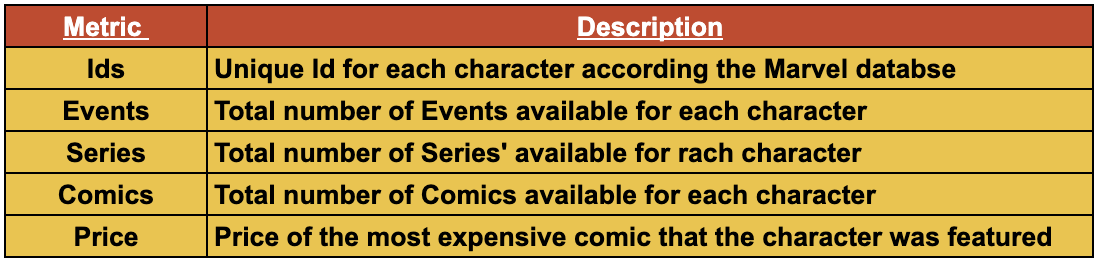

In [82]:
#Defining empty lists to later store the relevant data for each character
Ids=[]
Events=[]
Series=[]
Comics=[]
Price=[]

#URL that interacts with the /characters endpoint 
url_1=url("characters",public_key,private_key)

for i in tqdm(marvel): 
    
    params_1={"name":i}                                                   #pass character name 
    res1=requests.get(url_1,params_1).json()
    
    Ids.append(str(res1["data"]["results"][0]["id"]))                     #retrieves ID for character 
    Events.append(res1["data"]["results"][0]["events"]["available"])      #retrieves total events for characters 
    Series.append(res1["data"]["results"][0]["series"]["available"])      #retrieves total series for characters
    Comics.append(res1["data"]["results"][0]["comics"]["available"])      #retrieves total comics for characters
    
    #URL that interacts with the /characters/{characterID}/comics endpoint
    url_2=url("characters/"+Ids[marvel.index(i)]+"/comics",public_key,private_key)
    params_2={"limit":100,"characterId":int(Ids[marvel.index(i)])}         #pass characterID and set limit 100
    res2=requests.get(url_2,params_2).json()
    
    #retrieving the price of the most expensive comic
    no_of_comics = min(Comics[marvel.index(i)],100) 
    
    Price.append(max(res2["data"]["results"][j]["prices"][0]["price"] for j in range(no_of_comics)))  

100%|███████████████████████████████████████████| 30/30 [01:12<00:00,  2.42s/it]


In [83]:
#Converting into a pandas dataframe
data={"Character Name":marvel, "Character ID":Ids, "Total Available Events":Events, 
     "Total Available Series":Series, "Total Available Comics":Comics,
      "Price of the Most Expensive Comic":Price}
df=pd.DataFrame(data)

In [84]:
#Replacing the 0s with None datatype
df=df.replace(0, None)

In [85]:
#Printing the dataframe
df

,Character Name,Character ID,Total Available Events,Total Available Series,Total Available Comics,Price of the Most Expensive Comic
0,Dormammu,1009280,1,26,52,125.0
1,Carol Danvers,1009261,3,15,31,39.99
2,Agatha Harkness,1012717,None,9,20,3.99
3,Echo,1010785,1,20,42,24.99
4,Gamora,1010763,5,32,70,75.0
5,Wong,1009720,3,34,102,75.0
6,Groot,1010743,2,17,38,100.0
7,Drax,1010735,3,42,77,125.0
8,Peter quill,1010734,1,5,7,17.99
9,Mantis,1011026,4,15,52,39.99


In [76]:
#converting the pandas dataframe into a csv file 
df.to_csv('data.csv', index=False)